## Taxi Driver Churn- Ensemble Learning

## 0.0 Problem Definition   

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Taxi.  Taxi,wants to analyse driver attrition.      


## 0.1 Data Problem   
Data provided has monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a
driver will be leaving the company or not based on their attributes. We will build model using ensembles.       


## 0.2 Column Profile    
1. MMMM-YY : Reporting Date (Monthly)
2. Driver_ID : Unique id for drivers
3. Age : Age of the driver
4. Gender : Gender of the driver – Male : 0, Female: 1
5. City : City Code of the driver
6. Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
7. Income : Monthly average Income of the driver
8. Date Of Joining : Joining date for the driver
9. LastWorkingDate : Last date of working for the driver
10.Joining Designation : Designation of the driver at the time of joining
11.Grade : Grade of the driver at the time of reporting
12.Total Business Value : The total business value acquired by the driver in a
month (negative business indicates cancellation/refund or car EMI adjustments)
13.Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)    

## 0.3 Data download

# 1.0 Exploratory Data analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/case

/content/drive/MyDrive/case


In [4]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.float', '{:.2f}'.format)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

In [9]:
df = pd.read_csv('driver.csv',index_col=0)
df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.00,0.00,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.00,0.00,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.00,0.00,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.00,0.00,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.00,0.00,C7,2,67016,11/06/20,NaN,2,2,0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 2.5+ MB


• dataset has 19,104 rows and 13 columns    
• dataset has 1 object types, 9 numeric columns, 3 datetime types    
• nulls present in some columns     

In [ ]:
## convert object type to datetime
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

## convert object type to string
df['City'] = df['City'].astype('string')

In [ ]:
df.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

Following are the observations:
- Gender: has 2  types    
- Education_Level : has 3 types   
- Joining Designation : has 5 types   
- Grade : has 5 types
- Quarterly Rating : has 4 types

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,19104.00,1415.59,810.71,1.00,710.00,1417.00,2137.00,2788.00
Age,19043.00,34.67,6.26,21.00,30.00,34.00,39.00,58.00
Gender,19052.00,0.42,0.49,0.00,0.00,0.00,1.00,1.00
Education_Level,19104.00,1.02,0.80,0.00,0.00,1.00,2.00,2.00
Income,19104.00,65652.03,30914.52,10747.00,42383.00,60087.00,83969.00,188418.00
Joining Designation,19104.00,1.69,0.84,1.00,1.00,1.00,2.00,5.00
Grade,19104.00,2.25,1.03,1.00,1.00,2.00,3.00,5.00
Total Business Value,19104.00,571662.07,1128312.22,-6000000.00,0.00,250000.00,699700.00,33747720.00
Quarterly Rating,19104.00,2.01,1.01,1.00,1.00,2.00,3.00,4.00


In [ ]:
df.describe(include='datetime64')

<ipython-input-47-136f79f1d4c6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='datetime64')
<ipython-input-47-136f79f1d4c6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='datetime64')
<ipython-input-47-136f79f1d4c6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='datetime64')


,MMM-YY,Dateofjoining,LastWorkingDate
count,19104,19104,1616
unique,24,869,493
top,2019-01-01 00:00:00,2015-07-23 00:00:00,2020-07-29 00:00:00
freq,1022,192,70
first,2019-01-01 00:00:00,2013-04-01 00:00:00,2018-12-31 00:00:00
last,2020-12-01 00:00:00,2020-12-28 00:00:00,2020-12-28 00:00:00


- Dateofjoining : has date range 2013-04-01 to 2020-12-28
-	LastWorkingDate  : has date range 2018-12-31 to 2020-12-28

#1.2 Univariate Analysis

In [ ]:
num_cols = ['Driver_ID','Income','Total Business Value']
cat_cols = ['Gender','City','Education_Level','Joining Designation', 'Grade' ,'Quarterly Rating']
dt_cols =   ['MMM-YY','Dateofjoining','LastWorkingDate']

## 1.2.1 Numeric Features

In [ ]:
def plotcol(df,col):
  '''
  function to plot histogram,box plot for column
  '''
  fig, ax = plt.subplots(1,2, figsize=(10, 6))
  sns.histplot(data=df,x=col,kde='True',ax=ax[0])
  sns.boxplot(data=df,y=col,width=0.2,ax=ax[1])
  plt.subplots_adjust(wspace=0.3)
  plt.title(col)
  plt.show()

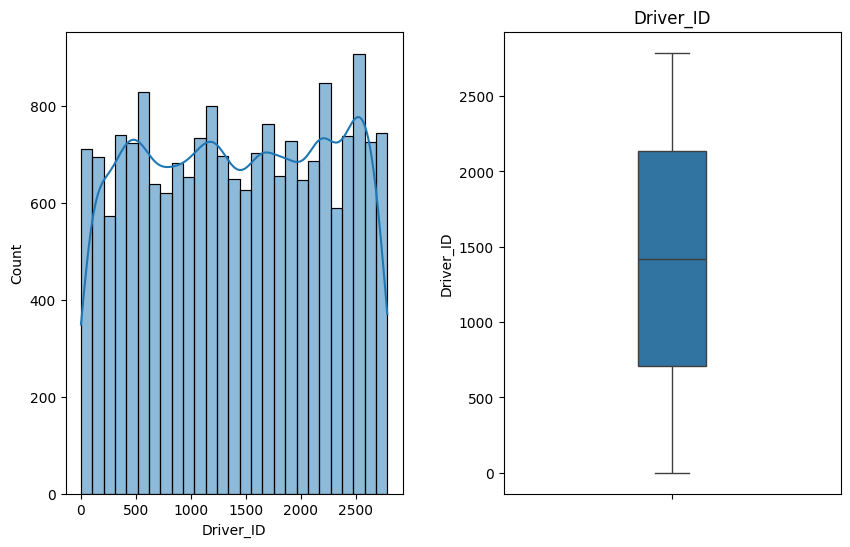

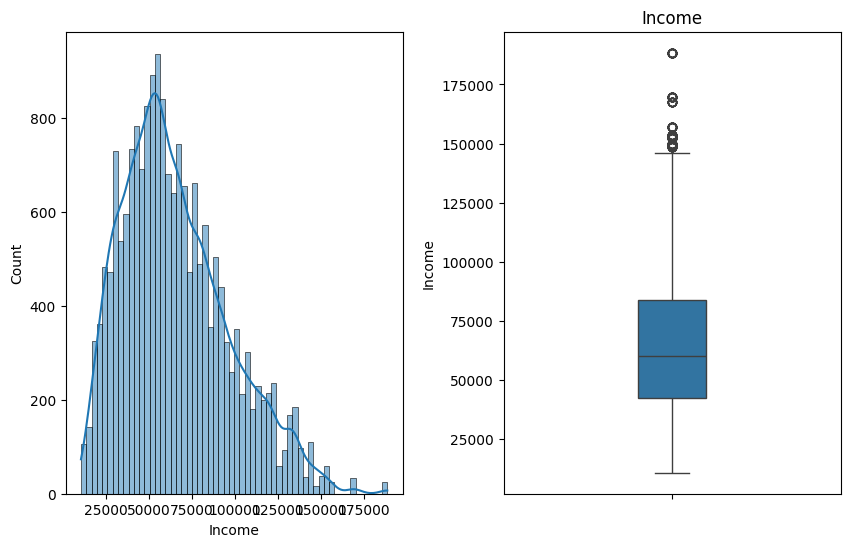

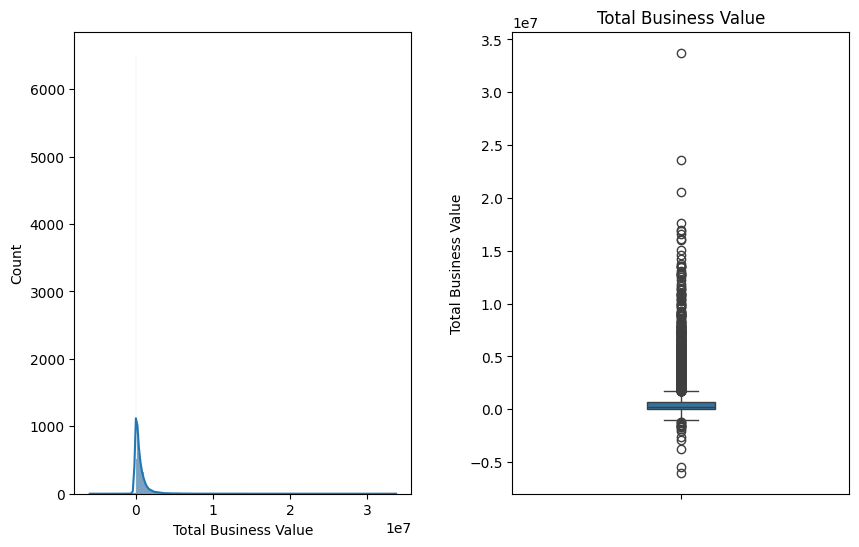

In [ ]:
for col in num_cols:
   plotcol(df,col)

## Observations   
- Driver_ID are around 3000  
- Medium income is around 5000, with few outliers
- Range of Total Business Value is narrow with many outliers

## 1.2.2 Categorical Columns

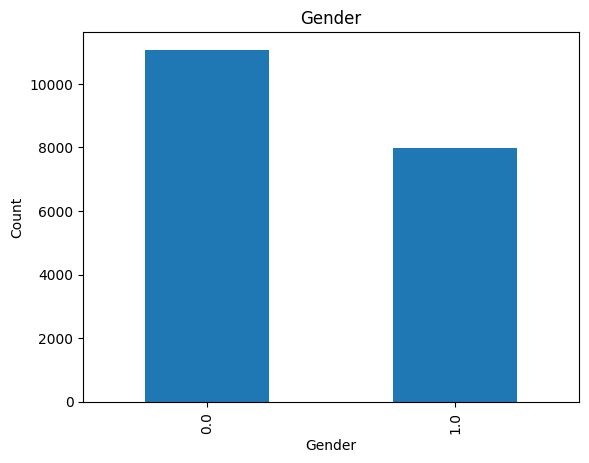

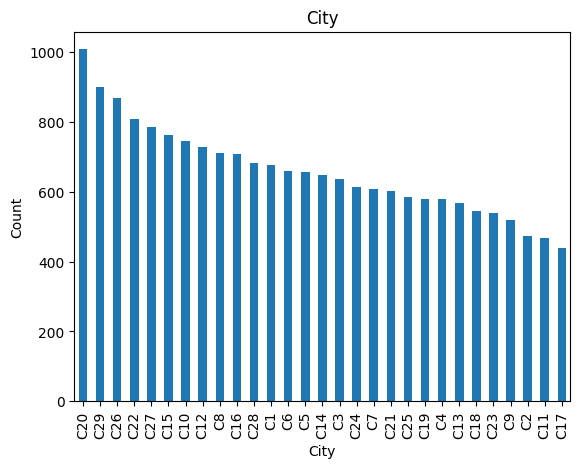

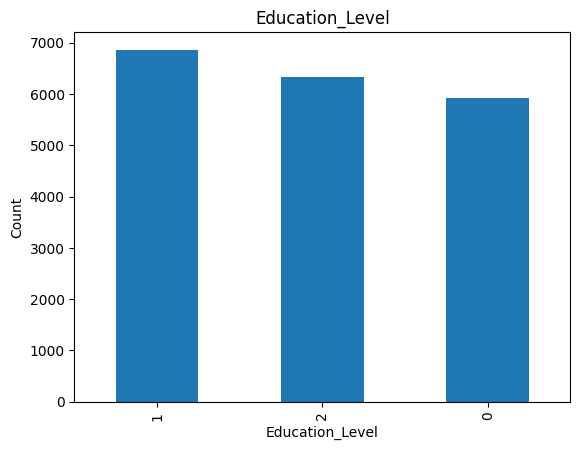

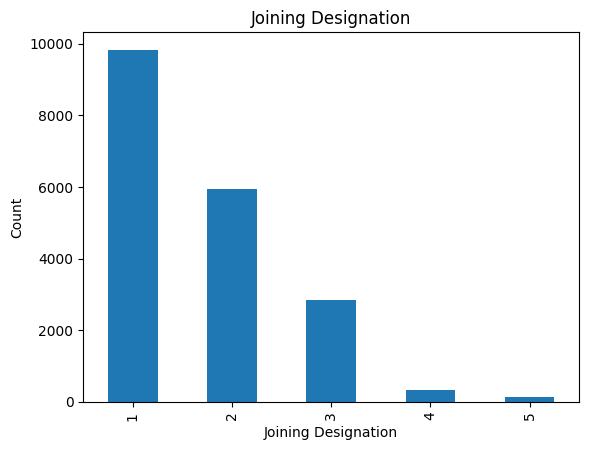

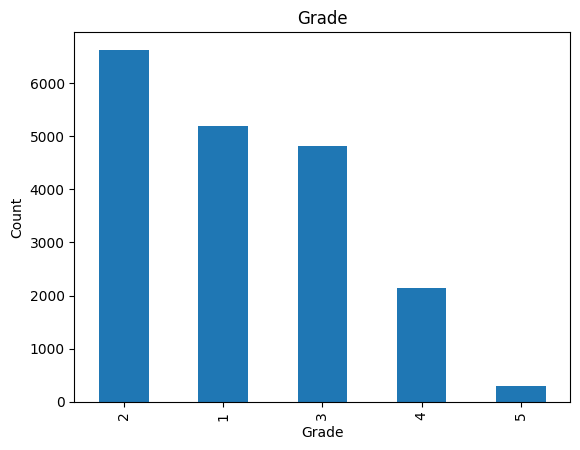

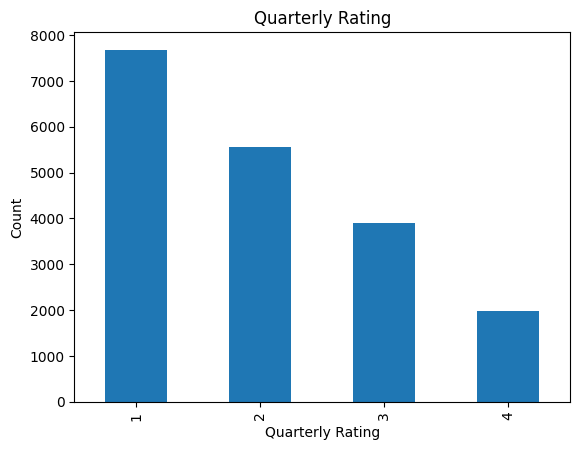

In [ ]:
for col in cat_cols:
    df[col].value_counts().plot.bar()
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Observations    

- Count of Gender is more   
- Top Three Cities are C20,C29,C26
- Education_Level 1 is highest followed by 2 and 0  
- Joining Designation 1 is highest followed by 2,3,4
- Grade 2 is highest followed by 1,3,4,5
- Top 3 Quaterly ratings are 1,2,3

## 1.7 Correlation Analysis

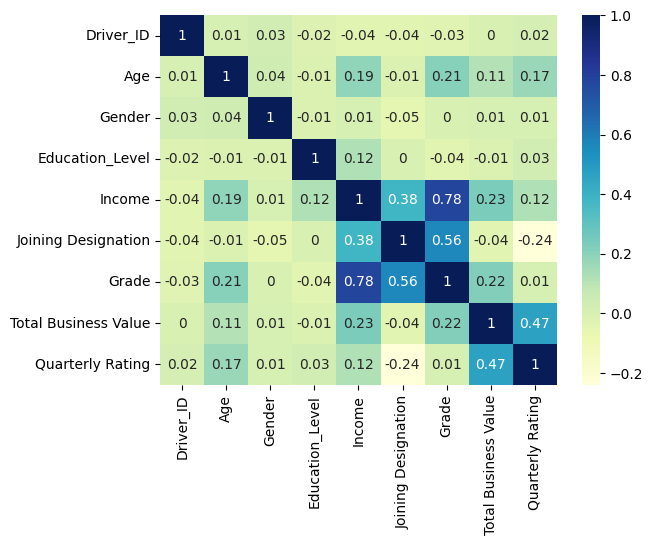

In [ ]:
# plotting correlation heatmap
corr_df =df.corr(numeric_only=True).round(2)
sns.heatmap(corr_df, cmap="YlGnBu", annot=True)
plt.show()

 Graph shows     
 - Strong correlation of between Income,Grade (0.78 )
 - Mediune correlation between Grade, Joining Designation (0.56)
 - Mediune correlation between Income, Joining Designation (0.38)


# 2.0 Data Preprocessing
## 2.1 Check for Missing value

In [ ]:
# percentage of missing values in each column
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

LastWorkingDate        91.54
Age                     0.32
Gender                  0.27
MMM-YY                  0.00
Driver_ID               0.00
City                    0.00
Education_Level         0.00
Income                  0.00
Dateofjoining           0.00
Joining Designation     0.00
Grade                   0.00
Total Business Value    0.00
Quarterly Rating        0.00
dtype: float64

Columns LastWorkingDate, Age, Gender has nulls.

In [ ]:
df_num =df.select_dtypes(include='number')
df_num.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,28.00,0.00,2,57387,1,1,2381060,2
1,1,28.00,0.00,2,57387,1,1,-665480,2
2,1,28.00,0.00,2,57387,1,1,0,2
3,2,31.00,0.00,2,67016,2,2,0,1
4,2,31.00,0.00,2,67016,2,2,0,1


## Null Handling with KNN Imputer
Columns LastWorkingDate, Age, Gender has nulls.        
We can use KNNImputer to handle null values. We use neighbours as 5 neighbours since cardinality of Joining Designation , Grade is 5. We use imputer for numeric datatypes having nulls.

In [ ]:
df_num = df.select_dtypes(include='number')
# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)

# Impute the missing values
X_imputed = imputer.fit_transform(df_num)

#convert to dataframe
df_im = pd.DataFrame(X_imputed)
# assign column names
df_im.columns = df_num.columns

# check for null in new df
df_im.isnull().sum()

Driver_ID               0
Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

In [ ]:
# create single dataframe with clean data
df_clean =  pd.concat([df_im,df[dt_cols],df['City']],axis=1)
df_clean.head(8)

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,Dateofjoining,LastWorkingDate,City
0,1.00,28.00,0.00,2.00,57387.00,1.00,1.00,2381060.00,2.00,2019-01-01,2018-12-24,NaT,C23
1,1.00,28.00,0.00,2.00,57387.00,1.00,1.00,-665480.00,2.00,2019-02-01,2018-12-24,NaT,C23
2,1.00,28.00,0.00,2.00,57387.00,1.00,1.00,0.00,2.00,2019-03-01,2018-12-24,2019-03-11,C23
3,2.00,31.00,0.00,2.00,67016.00,2.00,2.00,0.00,1.00,2020-11-01,2020-11-06,NaT,C7
4,2.00,31.00,0.00,2.00,67016.00,2.00,2.00,0.00,1.00,2020-12-01,2020-11-06,NaT,C7
5,4.00,43.00,0.00,2.00,65603.00,2.00,2.00,0.00,1.00,2019-12-01,2019-12-07,NaT,C13
6,4.00,43.00,0.00,2.00,65603.00,2.00,2.00,0.00,1.00,2020-01-01,2019-12-07,NaT,C13
7,4.00,43.00,0.00,2.00,65603.00,2.00,2.00,0.00,1.00,2020-02-01,2019-12-07,NaT,C13


## 3.0 Feature Engineering  

##  Aggregate &remove multiple driver occurrences  

In [ ]:
agg_fn= {
    "Age": "max",
    "Gender": "first",
    "Education_Level": "last",
    "Income": "last",
    "Joining Designation": "last",
    "Grade": "last",
    "Total Business Value": "sum",
    "Quarterly Rating": "last",
    "LastWorkingDate": "last",
    "City": "first",
    "Dateofjoining": "last" }

driver_df = df_clean.groupby(["Driver_ID"]).aggregate(agg_fn)

In [ ]:
driver_df.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,LastWorkingDate,City,Dateofjoining
Driver_ID,,,,,,,,,,,
1.00,28.00,0.00,2.00,57387.00,1.00,1.00,1715580.00,2.00,2019-03-11,C23,2018-12-24
2.00,31.00,0.00,2.00,67016.00,2.00,2.00,0.00,1.00,NaT,C7,2020-11-06
4.00,43.00,0.00,2.00,65603.00,2.00,2.00,350000.00,1.00,2020-04-27,C13,2019-12-07
5.00,29.00,0.00,0.00,46368.00,1.00,1.00,120360.00,1.00,2019-03-07,C9,2019-01-09
6.00,31.00,1.00,1.00,78728.00,3.00,3.00,1265000.00,2.00,NaT,C11,2020-07-31


## 3.1  Create Target variable  
 driver whose last working
day is present will have the value 1

In [ ]:
# create new dataframe having all features
new_data = driver_df.copy()

# create attribute having value "1" if last date is present
new_data['hasDt'] = new_data['LastWorkingDate'].notnull().astype(int)

## 3.2 Column for driver quarterly rating
 if quarterly rating has increased we assign the value 1

In [ ]:
#https://stackoverflow.com/questions/19078325/naming-returned-columns-in-pandas-aggregate-function
qtr_df = df_clean.groupby(["Driver_ID"]).agg(  qtr_last= ("Quarterly Rating","last"),
                                     qtr_first= ("Quarterly Rating","first"))

def qtr_increase(x):
  """
   function to check rating increment
  """
  if x['qtr_last'] > x['qtr_first'] :
      return 1
  else:
      return 0

#apply func columnwise
qtr_df['qtr_incr'] =qtr_df.apply(qtr_increase, axis=1)

# all_data.join(qtr_df['qtr_incr'])
new_data = pd.merge(new_data, qtr_df['qtr_incr'], left_index=True, right_index=True)

In [ ]:
qtr_df['qtr_incr'].value_counts()

0    2023
1     358
Name: qtr_incr, dtype: int64

## 3.3 Column for monthly driver income
if monthly income has increased we assign the value 1

In [ ]:
#https://stackoverflow.com/questions/19078325/naming-returned-columns-in-pandas-aggregate-function
month_df = df_clean.groupby(["Driver_ID"]).agg( mth_last= ("Income","last"),
                                     mth_first= ("Income","first"))


def mth_increase(x):
  """
   function to check monthly increment
  """
  if x['mth_last'] > x['mth_first'] :
      return 1
  else:
      return 0

#apply func columnwise
month_df['mnth_incr'] = month_df.apply(mth_increase, axis=1)

new_data = pd.merge(new_data,month_df['mnth_incr'] , left_index=True, right_index=True)

In [ ]:
month_df['mnth_incr'].value_counts()

0    2338
1      43
Name: mnth_incr, dtype: int64

In [ ]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2381.00,33.77,5.93,21.00,30.00,33.00,37.00,58.00
Gender,2381.00,0.41,0.49,0.00,0.00,0.00,1.00,1.00
Education_Level,2381.00,1.01,0.82,0.00,0.00,1.00,2.00,2.00
Income,2381.00,59334.16,28383.67,10747.00,39104.00,55315.00,75986.00,188418.00
Joining Designation,2381.00,1.82,0.84,1.00,1.00,2.00,2.00,5.00
Grade,2381.00,2.10,0.94,1.00,1.00,2.00,3.00,5.00
Total Business Value,2381.00,4586741.82,9127115.31,-1385530.00,0.00,817680.00,4173650.00,95331060.00
Quarterly Rating,2381.00,1.43,0.81,1.00,1.00,1.00,2.00,4.00
hasDt,2381.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
qtr_incr,2381.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00


## 1.3 Bivariate Analysis

## Categorical Bivariate Analysis

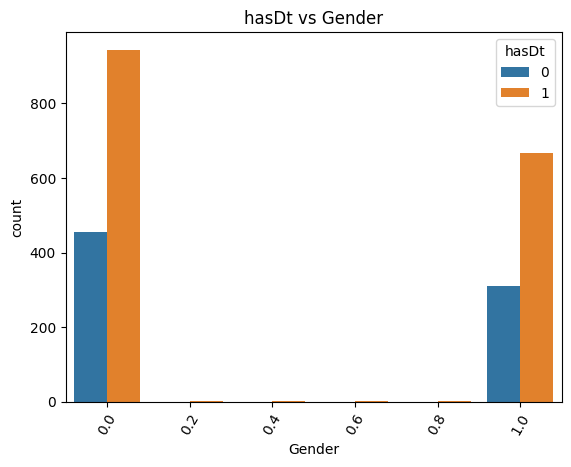

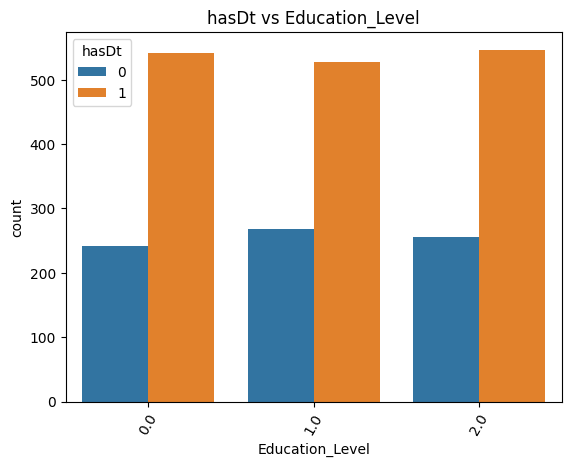

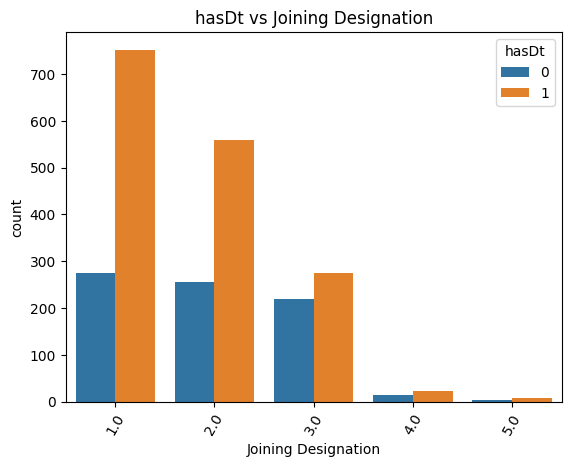

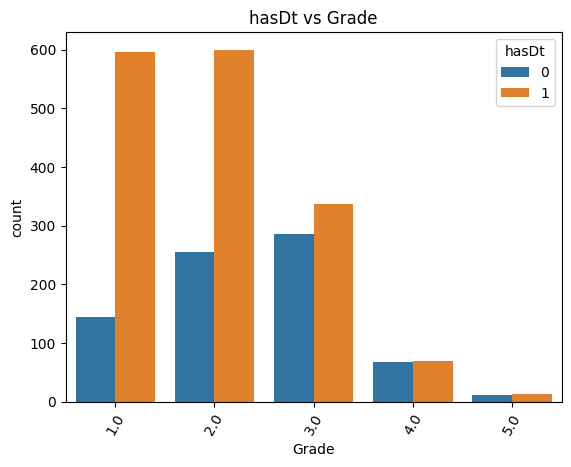

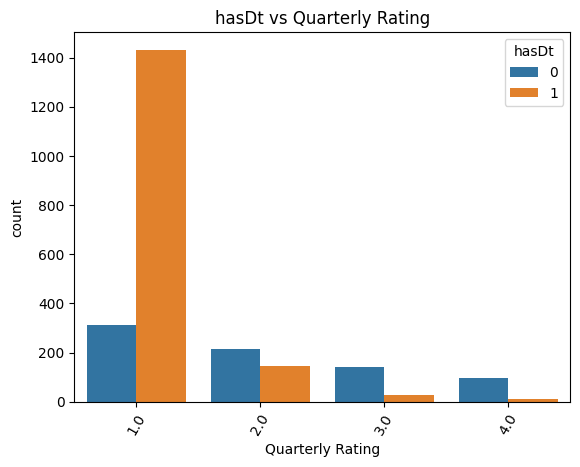

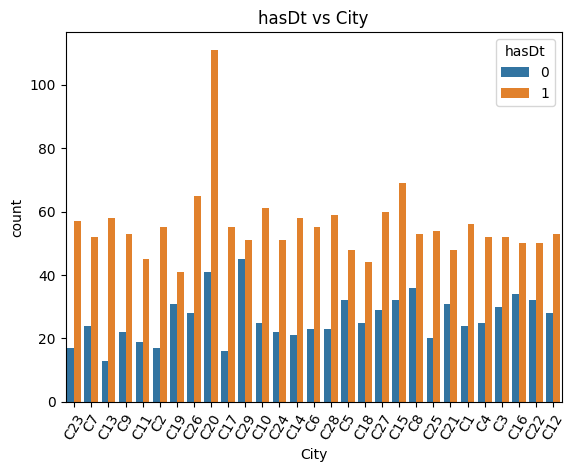

In [ ]:
plt_cols = ['Gender','Education_Level', 'Joining Designation', 'Grade', 'Quarterly Rating', 'City']
for col in plt_cols:
    sns.countplot(x=col, hue='hasDt', data=new_data)
    plt.xticks(rotation=60)
    plt.title(f"hasDt vs {col}")
    plt.show()

 ## Observations    

- In both Genders churn is more for hasDT =1   
- Across Education_Levels churn is more for hasDT =1  
- For Joining Designation 1,2,3 churn is more (hasDT =1)
- Grade 1,2  has high churn (hasDT=1)
- For Quaterly ratings= 1 churn is highest (hasDt=1)   
- For City C20 churn is highest(hasDT=1)

## Numeric Bivariate Analysis

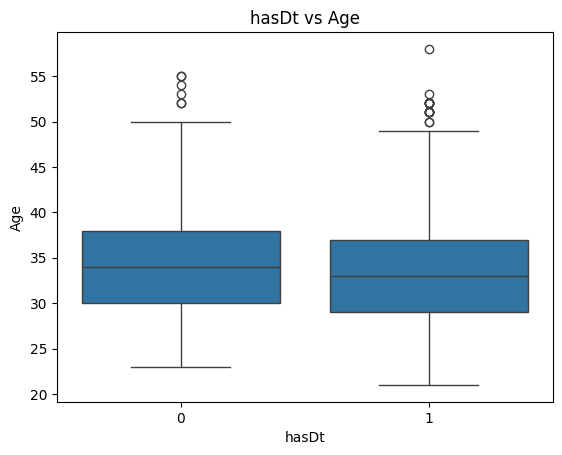

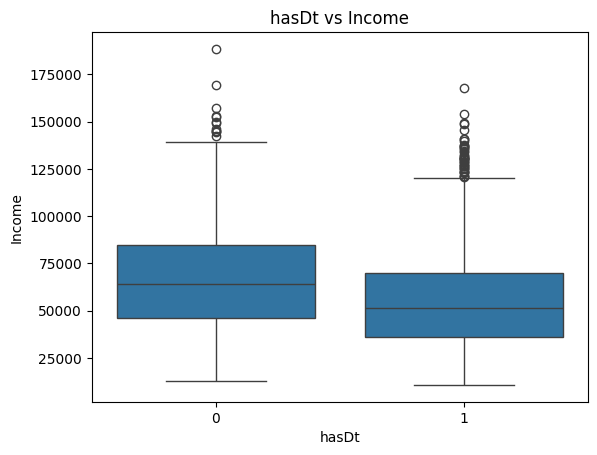

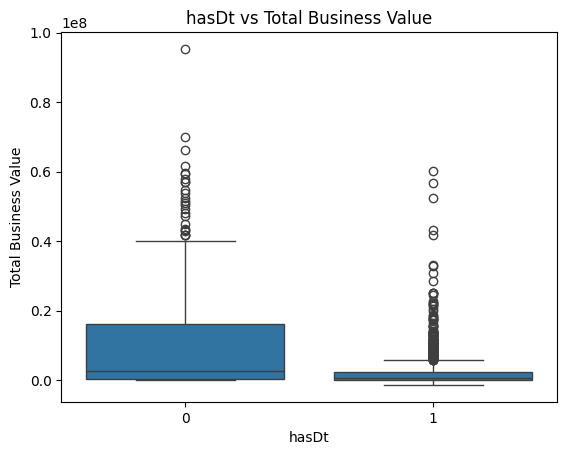

In [ ]:
plt_cols = ['Age','Income', 'Total Business Value']
for col in plt_cols:
    sns.boxplot(data=new_data, x='hasDt', y=col)
    plt.title(f"hasDt vs {col}")
    plt.xlabel('hasDt')
    plt.ylabel(col)
    plt.show()

 ## Observations    

- Median Age for hasDt=1 is less
- Income for hasDT =1 is less
- total Business Value for hasDt=1 is less

# Encoding Variables

In [ ]:
#convert string into one hot encoding
ohe_city = pd.get_dummies(new_data['City'])

## 2.5 Data preparation
#### 2.5.1 separate into independent & dependent data¶

In [ ]:
X = new_data[['Age','Gender',
             'Education_Level', 'Income',
             'Joining Designation', 'Grade',
             'Total Business Value','Quarterly Rating',
             'qtr_incr', 'mnth_incr']]

X = pd.merge(X,ohe_city , left_index=True, right_index=True)

y =  new_data['hasDt']

In [ ]:
# test for data imbalance
y.value_counts(normalize=True)

1   0.68
0   0.32
Name: hasDt, dtype: float64

In [ ]:
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            train_size=0.7,
                                            random_state = 42, stratify=y)

# 3.0 Model building   
## 3.1 Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.metrics import  confusion_matrix, classification_report,\
            ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [ ]:
# define model
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
rf = RandomForestClassifier(n_estimators=10, class_weight='balanced')

In [ ]:
# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_estimators=10),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c9dcfa97cd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c9ddb755a20>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 13, 'n_estimators': 467}


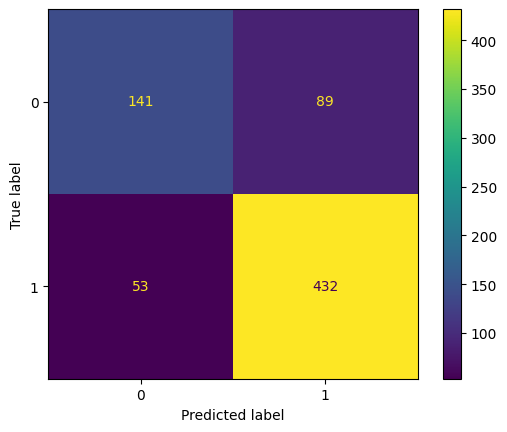

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.61      0.67       230
           1       0.83      0.89      0.86       485

    accuracy                           0.80       715
   macro avg       0.78      0.75      0.76       715
weighted avg       0.80      0.80      0.80       715



## Balanced SubSample

In [ ]:
rf2 = RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample')
# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf2,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                                    n_estimators=10),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c9dcfa97cd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c9ddb755a20>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 12, 'n_estimators': 142}


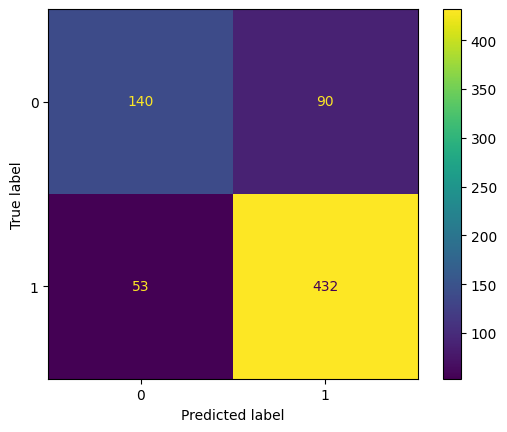

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.61      0.66       230
           1       0.83      0.89      0.86       485

    accuracy                           0.80       715
   macro avg       0.78      0.75      0.76       715
weighted avg       0.79      0.80      0.79       715



# Balanced data using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
print("Original class distribution:", Counter(y_train))

Original class distribution: Counter({1: 1131, 0: 535})


In [ ]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [ ]:
print("resampled class distribution:", Counter(y_train_resampled))

resampled class distribution: Counter({1: 1131, 0: 1131})


In [ ]:
rf3 = RandomForestClassifier(n_estimators=10)
# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf3,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train_resampled, y_train_resampled )

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c9dcfa97cd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c9ddb755a20>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 411}


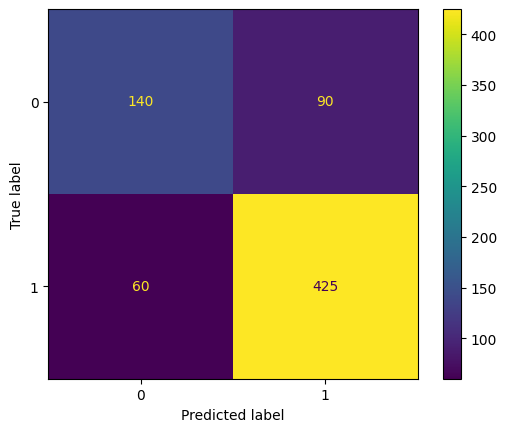

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65       230
           1       0.83      0.88      0.85       485

    accuracy                           0.79       715
   macro avg       0.76      0.74      0.75       715
weighted avg       0.78      0.79      0.79       715



In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr,)

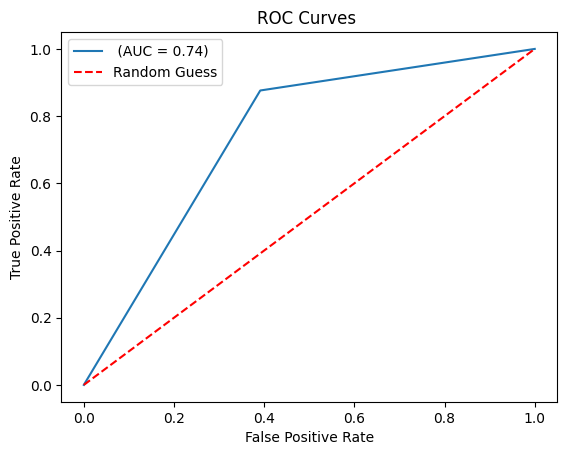

In [ ]:
#https://www.geeksforgeeks.org/auc-roc-curve/
plt.plot(fpr, tpr, label=f' (AUC = {roc_auc:.2f})')
# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves ')
plt.legend()
plt.show()

# Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'n_estimators':  [1, 3,  5, 7, 10 ],
    'learning_rate': [0.01,0.05,0.1,0.5,1],
    'algorithm':     ['SAMME', 'SAMME.R']
              }

In [ ]:
ada_clf =AdaBoostClassifier( random_state=0)

In [ ]:
# Use random search to find the best hyperparameters
grd_search = GridSearchCV(ada_clf,
                          param_grid = parameters,cv=5)

# Fit the random search object to the data
grd_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'n_estimators': [1, 3, 5, 7, 10]})

In [ ]:
# Create a variable for the best model
best_ada = grd_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  grd_search.best_params_)

Best hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 7}


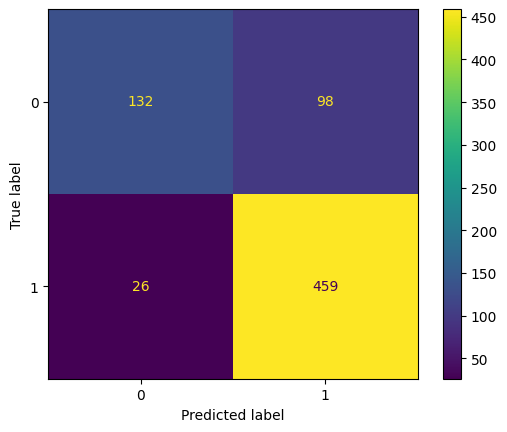

In [ ]:
# Generate predictions with the best model
y_pred = best_ada.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.57      0.68       230
           1       0.82      0.95      0.88       485

    accuracy                           0.83       715
   macro avg       0.83      0.76      0.78       715
weighted avg       0.83      0.83      0.82       715



In [ ]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr,)


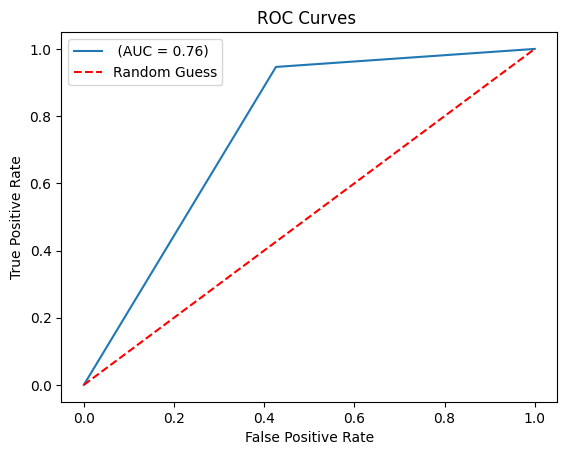

In [ ]:
#https://www.geeksforgeeks.org/auc-roc-curve/
plt.plot(fpr, tpr, label=f' (AUC = {roc_auc:.2f})')
# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves ')
plt.legend()
plt.show()

# 6.0 Insights & Recommendations
## Insights  
- Top Three Cities are C20,C29,C26
- Top three Quaterly ratings are 1,2,3
- Top three  Education_Level 1,2,0
- Top three Joining Designation 1 ,2,3   
- Grade 1,2 has high churn  
- City C20  has highest churn

## Recommendations
- Quaterly ratings 1 has highest churn. So efforts should be made to improve rating for drivers in this rating
- Joining Designation 1 ,2,3 has high churn so improvement efforts should be made in these  
- Grade 1,2,3 has high churn ,so these grades should be targetted for improvement.